In [3]:

# Importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Charger les données
df = pd.read_csv('../sales_data.csv')

# Afficher les 5 premières lignes
df.head()


,Order_ID,Date,Product,Category,Quantity,Unit_Price,Total,Sales_Rep,Region,Client_ID
0,ORD-0001,2025-06-10,Souris gamer,Accessoires,3,411.55,1234.65,Emma Petit,Nouvelle-Aquitaine,CLT-125
1,ORD-0002,2025-02-25,Sac à dos,Accessoires,5,137.08,685.40,Clara Moreau,Auvergne-Rhône-Alpes,CLT-266
2,ORD-0003,2024-09-06,Sac à dos,Accessoires,1,112.86,112.86,Bruno Dubois,Hauts-de-France,CLT-115
3,ORD-0004,2024-10-16,"Tablette 10""",Téléphonie,2,236.30,472.60,David Leroy,Auvergne-Rhône-Alpes,CLT-262
4,ORD-0005,2025-04-09,Souris gamer,Accessoires,5,379.92,1899.60,Emma Petit,Auvergne-Rhône-Alpes,CLT-012


In [4]:
df.shape

(500, 10)

In [5]:
df.dtypes

Order_ID       object
Date           object
Product        object
Category       object
Quantity        int64
Unit_Price    float64
Total         float64
Sales_Rep      object
Region         object
Client_ID      object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order_ID    500 non-null    object 
 1   Date        500 non-null    object 
 2   Product     500 non-null    object 
 3   Category    500 non-null    object 
 4   Quantity    500 non-null    int64  
 5   Unit_Price  500 non-null    float64
 6   Total       500 non-null    float64
 7   Sales_Rep   500 non-null    object 
 8   Region      500 non-null    object 
 9   Client_ID   500 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 39.2+ KB


In [7]:
df.columns


Index(['Order_ID', 'Date', 'Product', 'Category', 'Quantity', 'Unit_Price',
       'Total', 'Sales_Rep', 'Region', 'Client_ID'],
      dtype='object')

In [8]:
# Recalcul du chiffre d'affaires ligne par ligne
df['revenue'] = df['Unit_Price'] * df['Quantity']
total_revenue = df['revenue'].sum()

print(f"💰 Chiffre d'affaires total : {total_revenue:,.2f} €")


💰 Chiffre d'affaires total : 397,748.94 €


In [9]:
top_products = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(5)

print("📦 Top 5 des produits les plus vendus :")
print(top_products)


📦 Top 5 des produits les plus vendus :
Product
Portable 15"    192
Souris gamer    167
Sac à dos       162
Écran 24"       156
Tablette 10"    150
Name: Quantity, dtype: int64


In [10]:
import plotly.express as px

# Transformation en DataFrame pour l'affichage
top_products_df = top_products.reset_index()
top_products_df.columns = ['Product', 'Total_Quantity']

# Graphique en barres
fig = px.bar(
    top_products_df,
    x='Product',
    y='Total_Quantity',
    title='Top 5 des produits les plus vendus',
    color='Product',
    text='Total_Quantity'
)

fig.update_layout(xaxis_title='Produit', yaxis_title='Quantité vendue')
fig.show()

In [11]:
# Conversion de la colonne Date au format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Création d'une colonne 'Month' formatée en Année-Mois
df['Month'] = df['Date'].dt.to_period('M')


In [12]:
# Somme du chiffre d'affaires par mois
monthly_revenue = df.groupby('Month')['revenue'].sum().reset_index()
monthly_revenue['Month'] = monthly_revenue['Month'].astype(str)  # pour Plotly

monthly_revenue.head()


,Month,revenue
0,2024-07,13366.82
1,2024-08,37150.69
2,2024-09,39323.00
3,2024-10,28286.89
4,2024-11,21749.50


In [ ]:
# Graphique d'évolution mensuelle
fig = px.line(
    monthly_revenue,
    x='Month',
    y='revenue',
    title='Évolution mensuelle du chiffre d\'affaires',
    markers=True
)

fig.update_layout(xaxis_title='Mois', yaxis_title='Chiffre d\'affaires (€)')
fig.show()

In [14]:
# Chiffre d'affaires total par commercial
sales_by_rep = df.groupby('Sales_Rep')['revenue'].sum().sort_values(ascending=False).reset_index()

sales_by_rep.columns = ['Sales_Rep', 'Total_Revenue']
sales_by_rep.head()


,Sales_Rep,Total_Revenue
0,Bruno Dubois,87466.06
1,Alice Martin,80940.89
2,Emma Petit,79777.05
3,David Leroy,77541.50
4,Clara Moreau,72023.44


In [15]:
fig = px.bar(
    sales_by_rep,
    x='Total_Revenue',
    y='Sales_Rep',
    title='Chiffre d\'affaires par commercial',
    orientation='h',
    color='Sales_Rep',
    text='Total_Revenue'
)

fig.update_layout(xaxis_title='Chiffre d\'affaires (€)', yaxis_title='Commercial')
fig.show()

In [16]:
# Agrégation du chiffre d'affaires par région
sales_by_region = df.groupby('Region')['revenue'].sum().sort_values(ascending=False).reset_index()

sales_by_region.columns = ['Region', 'Total_Revenue']
sales_by_region.head()


,Region,Total_Revenue
0,Hauts-de-France,82570.62
1,Nouvelle-Aquitaine,81766.10
2,Île-de-France,79097.98
3,Auvergne-Rhône-Alpes,78482.34
4,Occitanie,75831.90


In [17]:
fig = px.bar(
    sales_by_region,
    x='Region',
    y='Total_Revenue',
    title='Chiffre d\'affaires par région',
    color='Region',
    text='Total_Revenue'
)

fig.update_layout(xaxis_title='Région', yaxis_title='Chiffre d\'affaires (€)')
fig.show()


In [18]:
sales_by_category = df.groupby('Category')['revenue'].sum().sort_values(ascending=False).reset_index()
sales_by_category.columns = ['Category', 'Total_Revenue']
sales_by_category.head()


,Category,Total_Revenue
0,Accessoires,155793.44
1,Téléphonie,78148.18
2,Ordinateurs,55704.76
3,Écrans,38928.93
4,Audio,35649.76


In [19]:
fig = px.pie(
    sales_by_category,
    names='Category',
    values='Total_Revenue',
    title='Répartition du chiffre d\'affaires par catégorie'
)

fig.show()


In [20]:
top_clients = df.groupby('Client_ID')['revenue'].sum().sort_values(ascending=False).reset_index()
top_clients.columns = ['Client_ID', 'Total_Revenue']

# Top 10
top_clients = top_clients.head(10)
top_clients

,Client_ID,Total_Revenue
0,CLT-268,4489.19
1,CLT-259,4381.82
2,CLT-032,4306.17
3,CLT-150,4242.55
4,CLT-094,4195.63
5,CLT-012,4096.69
6,CLT-075,4063.66
7,CLT-143,4032.64
8,CLT-263,4010.78
9,CLT-221,3969.54


In [21]:
fig = px.bar(
    top_clients,
    x='Client_ID',
    y='Total_Revenue',
    title='Top 10 clients – Chiffre d\'affaires',
    text='Total_Revenue',
    color='Client_ID'
)

fig.update_layout(xaxis_title='Client ID', yaxis_title='Chiffre d\'affaires (€)')
fig.show()


C:\Users\S_Esther\AppData\Local\Temp\ipykernel_10524\371658697.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




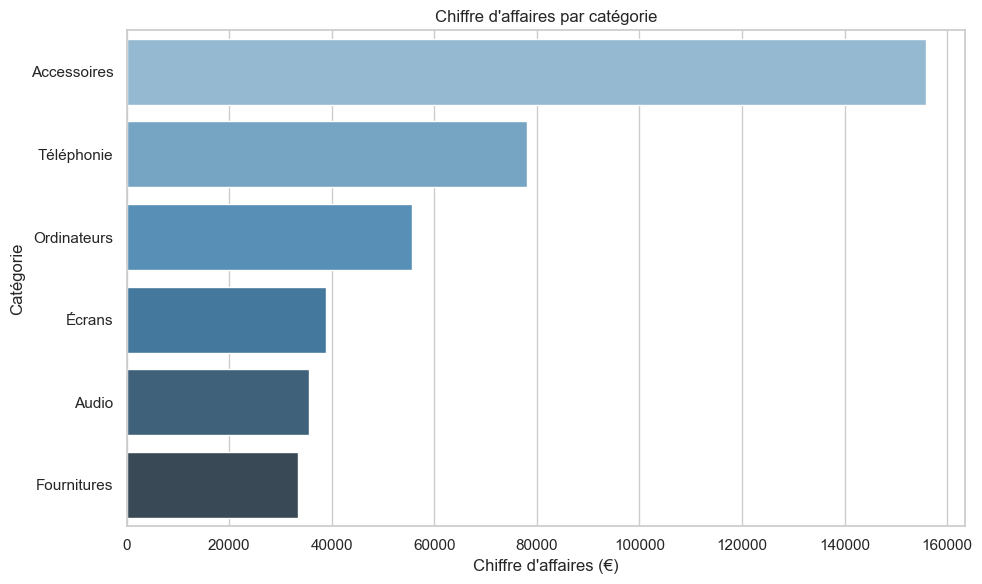

In [22]:
# Assurer le style
sns.set(style="whitegrid")

# Regrouper les données
revenue_by_category = df.groupby('Category')['Total'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_category.values, y=revenue_by_category.index, palette="Blues_d")
plt.title("Chiffre d'affaires par catégorie")
plt.xlabel("Chiffre d'affaires (€)")
plt.ylabel("Catégorie")
plt.tight_layout()
plt.show()

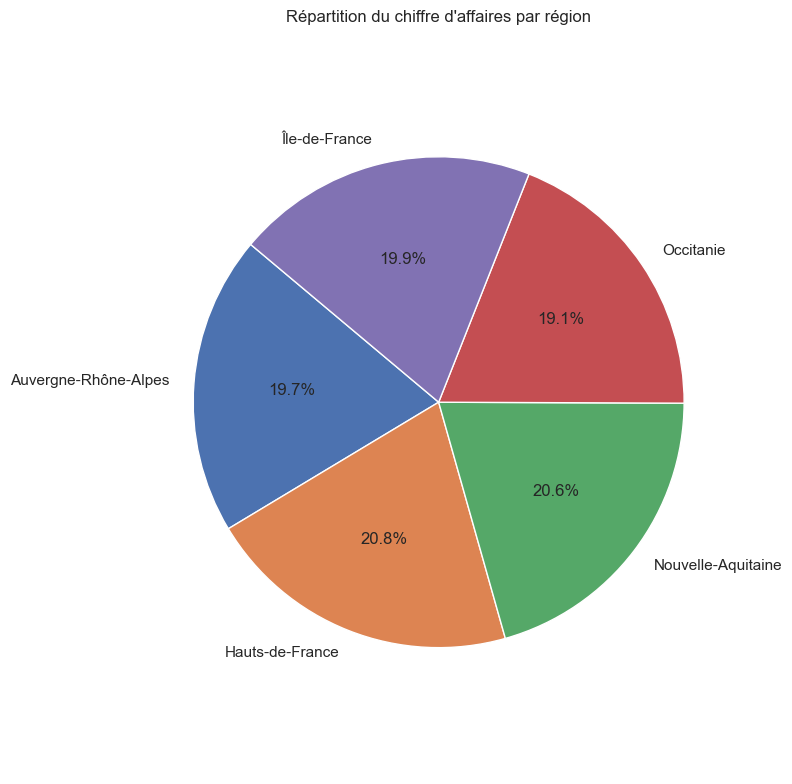

In [23]:
sales_by_region = df.groupby('Region')['Total'].sum()

plt.figure(figsize=(8, 8))
plt.pie(sales_by_region, labels=sales_by_region.index, autopct='%1.1f%%', startangle=140)
plt.title("Répartition du chiffre d'affaires par région")
plt.axis('equal')  # Cercle
plt.tight_layout()
plt.show()
